In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#스마트워치에서 추출할수있는 10개변수만을 담은 데이터
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
test=pd.read_csv('/content/drive/MyDrive/final_test_2.csv')
test

,SleepTime,SleepE%,REM latency(Min),"Snoring Size(1:mild,2:morderate,3:severe)",AHI,SpO2_AVG,SpO2_MIN,Time_under90(Min),BMI,HTN
0,316.0,82.9,142.5,2.0,21.8,94.1,83.0,7.2,25.5,1.0
1,355.0,80.9,261.5,1.0,2.7,94.5,90.0,0.6,29.6,1.0
2,363.5,90.1,107.5,2.0,36.0,93.3,83.0,12.7,26.3,0.0
3,415.5,76.8,163.5,0.0,5.0,96.3,94.0,0.0,26.7,0.0
4,384.5,87.5,155.5,2.0,37.1,93.6,76.0,28.1,26.5,1.0
...,...,...,...,...,...,...,...,...,...,...
265,234.0,62.9,293.5,2.0,8.5,94.4,76.0,8.0,27.9,1.0
266,346.5,90.9,100.5,2.0,10.0,92.6,75.0,20.5,37.0,1.0
267,361.0,98.0,58.0,2.0,27.9,93.4,73.0,14.2,29.3,1.0
268,459.5,92.6,81.5,2.0,1.8,97.3,90.0,0.6,23.6,0.0


AHI                                          1.000000
Time_under90(Min)                            0.696396
Snoring Size(1:mild,2:morderate,3:severe)    0.598786
BMI                                          0.384380
REM latency(Min)                             0.137350
HTN                                          0.093755
SleepE%                                     -0.143706
SleepTime                                   -0.197599
SpO2_AVG                                    -0.682151
SpO2_MIN                                    -0.731016
Name: AHI, dtype: float64


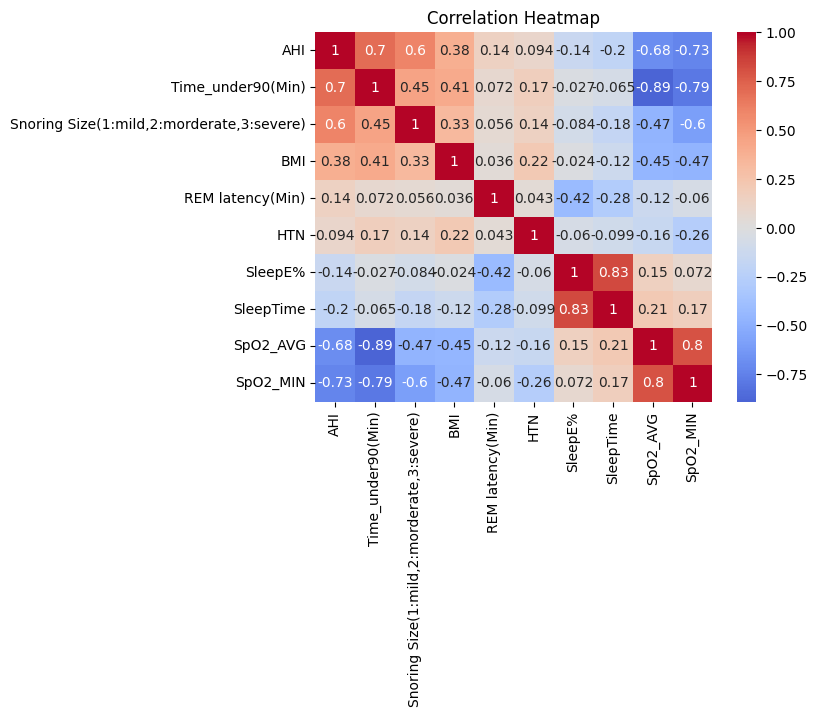

In [7]:
#heatmap
# 상관 계수 행렬 계산
correlation_matrix = test.corr()

# AHI와의 상관 관계를 기준으로 내림차순으로 정렬
sorted_correlations_with_ahi = correlation_matrix['AHI'].sort_values(ascending=False)

# 결과 출력
print(sorted_correlations_with_ahi)

# AHI와 상관 관계가 가장 높은 변수 시각화 (예를 들어, 상위 3개 변수)
top_correlated_vars = sorted_correlations_with_ahi  # 상위 3개 변수 + AHI 자신
sns.heatmap(test[top_correlated_vars.index].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [10]:
#스피어만 상관계수
# 피처 이름에 특수 문자가 포함되어 있는 경우 수정
test.columns = test.columns.str.replace(' ', '_')  # 공백을 언더스코어로 변경
test.columns = test.columns.str.replace('-', '_')  # 대시를 언더스코어로 변경
test.columns = test.columns.str.replace('[^a-zA-Z0-9_]', '_', regex=True) # 특수문자를 언더스코어로 변경

test.columns

from scipy.stats import spearmanr

# 'AHI'와 다른 변수들 간의 스피어만 상관계수 계산
ahi_corr = {}
for col in test.columns:
    if col != 'AHI':
        corr, _ = spearmanr(test['AHI'], test[col])
        ahi_corr[col] = corr

# 결과 출력
print("Spearman Correlation with AHI:")
for col, corr in ahi_corr.items():
    print(f"{col}: {corr:.2f}")

Spearman Correlation with AHI:
SleepTime: -0.19
SleepE_: -0.15
REM_latency_Min_: 0.12
Snoring_Size_1_mild_2_morderate_3_severe_: 0.68
SpO2_AVG: -0.65
SpO2_MIN: -0.77
Time_under90_Min_: 0.81
BMI: 0.37
HTN: 0.16


> 피어슨 상관관계 해석 결과

SleepTime : 약한 음의 상관관계 <br>
Remlatencymin: 약한 음의 상관관계<br>
snoringsize: 강한 양의 상관관계<br>
sp02_avg: 강한 음의 상관관계<br>
sp02_min: 강한 음의 상관관계<br>
timeunder90: 매우 강한 양의 상관관계<br>
bmi: 중간정도 양의 상관관계<br>
htn: 약한 양의 상관관계

In [16]:
# 피어슨상관계수를 바탕으로 변수 선정
selected_columns = ['Snoring_Size_1_mild_2_morderate_3_severe_', 'SpO2_AVG', 'SpO2_MIN', 'Time_under90_Min_', 'BMI']
df_selected = test[selected_columns]

print(df_selected)

# 변수들 사이의 공분산 계산
cov_matrix = df_selected.cov()

print("Variables Covariance Matrix:")
print(cov_matrix)

     Snoring_Size_1_mild_2_morderate_3_severe_  SpO2_AVG  SpO2_MIN  \
0                                          2.0      94.1      83.0   
1                                          1.0      94.5      90.0   
2                                          2.0      93.3      83.0   
3                                          0.0      96.3      94.0   
4                                          2.0      93.6      76.0   
..                                         ...       ...       ...   
265                                        2.0      94.4      76.0   
266                                        2.0      92.6      75.0   
267                                        2.0      93.4      73.0   
268                                        2.0      97.3      90.0   
269                                        2.0      94.1      68.0   

     Time_under90_Min_   BMI  
0                  7.2  25.5  
1                  0.6  29.6  
2                 12.7  26.3  
3                  0.0  26.7  
4   

In [17]:
#다중공선성확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 주어진 변수들을 포함한 데이터프레임 X
X = test[['Snoring_Size_1_mild_2_morderate_3_severe_', 'SpO2_AVG',
        'Time_under90_Min_', 'BMI']]

# VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                                     feature        VIF
0  Snoring_Size_1_mild_2_morderate_3_severe_   7.151696
1                                   SpO2_AVG  31.644261
2                          Time_under90_Min_   2.158602
3                                        BMI  36.146865


In [18]:
#time_under90_min과 bmi의 강한 연관성
#bmi를 제거했더니 모든 변수의 vif가 10이하로 떨어짐
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 주어진 변수들을 포함한 데이터프레임 X
X = test[['Snoring_Size_1_mild_2_morderate_3_severe_', 'SpO2_AVG',
        'Time_under90_Min_']]

# VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                                     feature       VIF
0  Snoring_Size_1_mild_2_morderate_3_severe_  6.884574
1                                   SpO2_AVG  5.411618
2                          Time_under90_Min_  1.797540


In [ ]:
#최종 선정 변수 : 'Snoring_Size_1_mild_2_morderate_3_severe_', 'SpO2_AVG','Time_under90_Min_'